like regression SVM is also supervised learning
however SVM i.e. support vector machine is a kind of classifier.
multi label classification is possible with SVM
in regression we found the best fit line through the data. in SVM we find the best margin that seperates the data.


every point's distance from this line is a measure of accurasy of algorithum
there are linear, quadratic and RBF kernals availible for SVM

In [24]:
#imports 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import linear_model
%matplotlib notebook
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import seaborn as sns

In [25]:
DataFile = pd.read_csv('C:/Users/muneeba/Desktop/THESIS/DataDistributionPCA.csv') 
DataFile=DataFile[:65]
DataFile=DataFile.iloc[:,4:10]
DataFile.describe()

,0.2,0.4,0.6,0.8,1,1.2
count,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01
mean,8.477821e-02,8.197989e-02,7.698065e-02,7.017216e-02,6.172612e-02,5.221328e-02
std,1.073161e-01,1.037069e-01,9.746982e-02,8.932636e-02,8.016903e-02,7.149178e-02
min,4.290000e-08,4.170000e-08,3.990000e-08,3.750000e-08,3.470000e-08,3.140000e-08
25%,2.439750e-03,2.357000e-03,2.203250e-03,1.993750e-03,1.721250e-03,1.417000e-03
50%,1.965000e-02,1.895000e-02,1.760000e-02,1.570000e-02,1.390000e-02,1.230000e-02
75%,1.412500e-01,1.357500e-01,1.235000e-01,1.132500e-01,1.075000e-01,8.085000e-02
max,3.290000e-01,3.200000e-01,3.090000e-01,2.970000e-01,2.830000e-01,2.680000e-01


In [26]:
DataFile.head()

,0.2,0.4,0.6,0.8,1,1.2
0,0.189000,0.184000,0.17600,0.166000,0.153000,0.139000
1,0.157000,0.153000,0.14600,0.138000,0.127000,0.115000
2,0.051500,0.050100,0.04790,0.045100,0.041600,0.037700
3,0.006690,0.006510,0.00622,0.005850,0.005400,0.004880
4,0.000579,0.000559,0.00052,0.000465,0.000396,0.000317


In [56]:
data_frame = pd.DataFrame( DataFile)
data_frame['0.2']=data_frame['0.8'] # setting the target
X = data_frame.drop('0.2', axis=1)
print(X.shape)
print(type(X))
Y =np.array([1,2,3,1,2,1,3,2,1,3,1,2,3,4,2,1,1,1,1,4,1,1,1,2,2,2,2,2,2,4,4,2,2,2,3,3,3,4,4,4,4,3,3,2,2,2,2,2,4,4,4,2,2,2,1,2,1,2,3,3,4,4,3,3])
pd.DataFrame(Y)

(64, 5)
<class 'pandas.core.frame.DataFrame'>


,0
0,1
1,2
2,3
3,1
4,2
5,1
6,3
7,2
8,1
9,3


In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=3/4., random_state=0) # split the data in train and test data
print(X_train.shape)
print(Y_train.shape)

(16, 5)
(16,)


In [58]:
import csv
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
from sklearn import preprocessing
plt.ioff()
pd.set_option('display.max_columns', None)

In [59]:
svm_model = svm.SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, Y_train)

Y_train_pred = svm_model.predict(X_train)
Y_test_pred = svm_model.predict(X_test)

train_mse = sklearn.metrics.mean_squared_error(Y_train, Y_train_pred)
test_mse = sklearn.metrics.mean_squared_error(Y_test, Y_test_pred)
print("Train MSE {}".format(train_mse))
print("Test MSE {}".format(test_mse))

train_accuracy = sklearn.metrics.accuracy_score(Y_train, Y_train_pred)
test_accuracy = sklearn.metrics.accuracy_score(Y_test, Y_test_pred)
print("Train Accuracy {}%".format(train_accuracy*100.0))
print("Test Accuracy {}%".format(test_accuracy*100))

 

Train MSE 1.4375
Test MSE 1.1666666666666667
Train Accuracy 31.25%
Test Accuracy 39.58333333333333%


In [60]:
svm_model.predict(X)
cf_matrix = confusion_matrix(Y_test, Y_test_pred)

Confusion matrix, without normalization
[[ 0 11  0  0]
 [ 0 19  0  0]
 [ 0  9  0  0]
 [ 0  9  0  0]]


<IPython.core.display.Javascript object>


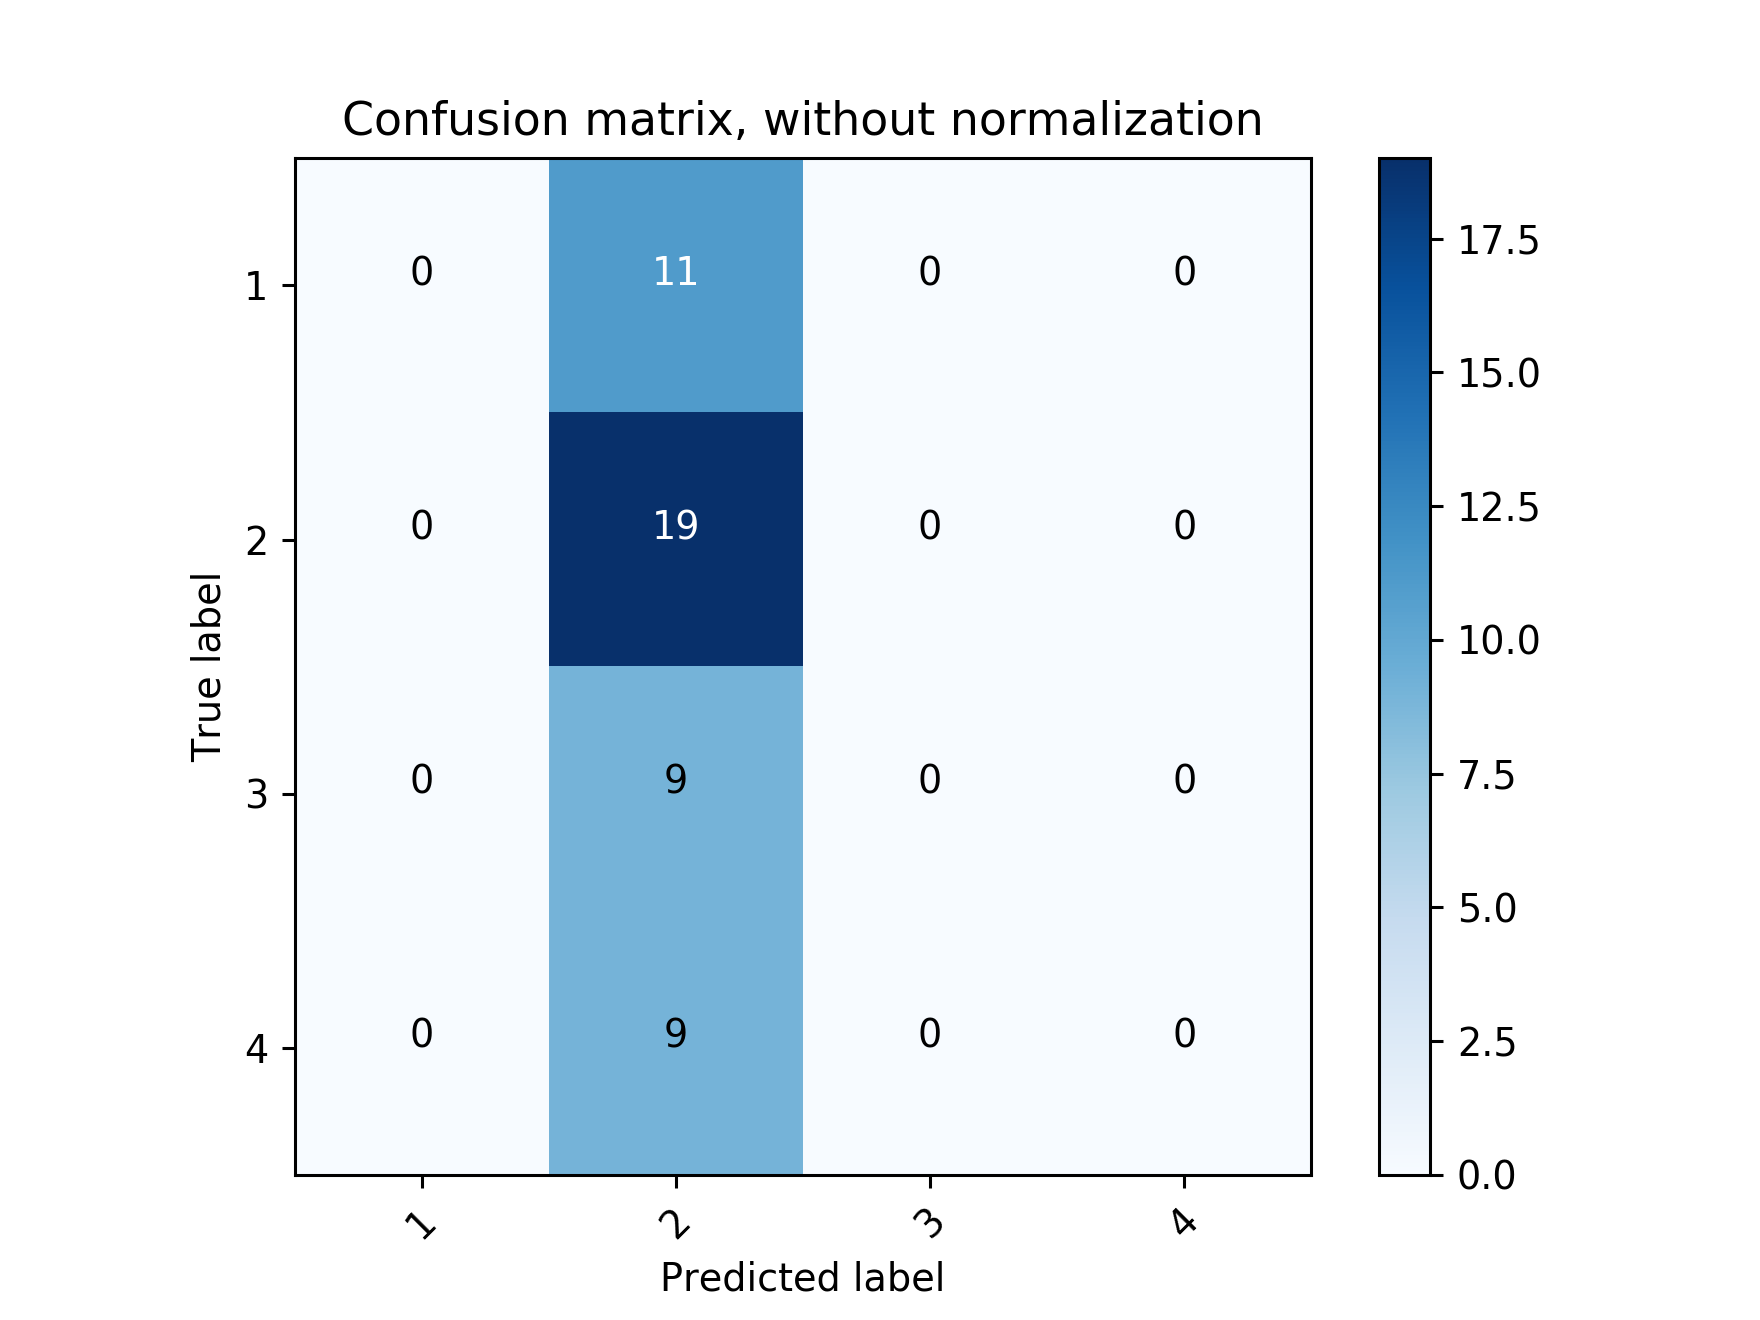

In [61]:
# adapted from:
# https://github.com/scikit-learn/scikit-learn/blob/master/examples/model_selection/plot_confusion_matrix.py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
plot_confusion_matrix(cf_matrix, classes=["1", "2", "3", "4"],
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[ 0.  1.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  0.  0.]]


<IPython.core.display.Javascript object>


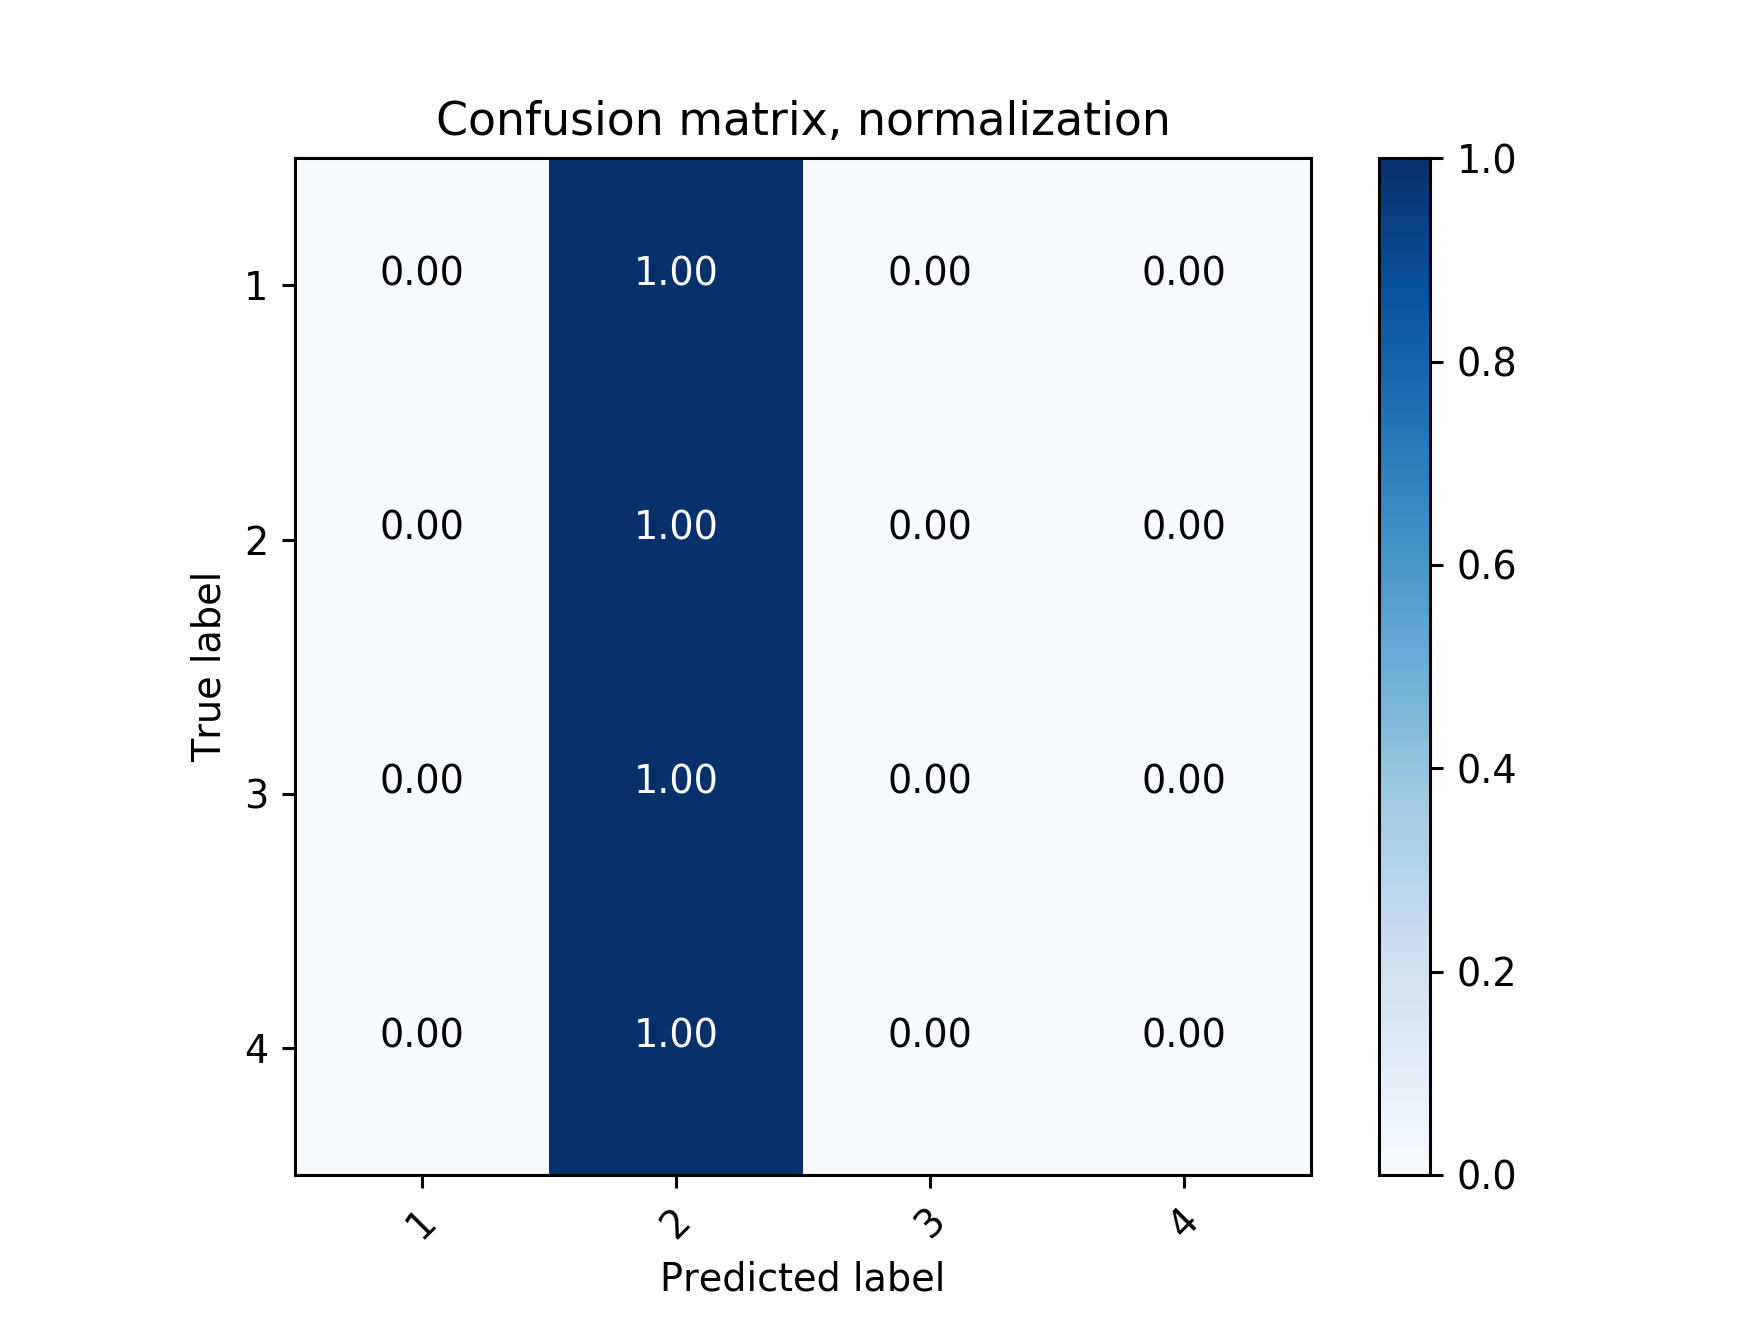

In [62]:
plot_confusion_matrix(cf_matrix, classes=["1", "2", "3", "4"],
                      title='Confusion matrix, normalization', normalize=True)
plt.show()